In [1]:
import pickle
import pandas as pd
import yaml
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
sys.path.append('../src')
from portfolio_opt_methods import mv_portfolio

In [2]:
folder = '9. 25.07 | 19-15 | pinnacle-2019-2021-MV'

In [3]:
with open('../conf/analysis.yaml', 'r') as file:
    full_conf = yaml.safe_load(file)

In [4]:
returns_full = pd.read_csv(f'../output-scratch/{folder}/returns.csv')
returns_full['Date'] = pd.to_datetime(returns_full['Date'])  
returns_full.index  = returns_full['Date']
returns_full.drop(columns=['Date'], inplace=True)

In [5]:
with open(f'../output-scratch/{folder}/port_cov.pkl', 'rb') as f:
    port_cov = pickle.load(f)

# returns

In [6]:
period_good = '2019-01-03-2019-12-20'
period_entire = '2019-01-01-2021-12-31'

period = period_good

period_start = period[:10]
period_end = period[11:]

print(period_start)
print(period_end)

2019-01-03
2019-12-20


In [7]:
returns = returns_full[returns_full.index >= period_start]
returns = returns[returns.index <= period_end]
Y = returns

In [8]:
Y.shape

(252, 10)

In [9]:
# Y.drop(columns=['EN'], inplace=True)

In [10]:
# fig, axs = plt.subplots(round(Y.shape[1] / 5), 5, figsize=(15, 15)) # Creating a 5x5 subplots
# axs = axs.ravel() # to iterate over the 5x5 matrix easily

# for i in range(Y.shape[1]): # Iterate through each subplot
#     axs[i].plot(Y.iloc[:, i]) # Plot the i-th column time series on the i-th subplot
#     axs[i].set_title(Y.columns[i]) # Set the title to the column name

# plt.tight_layout() # To prevent overlapping labels
# plt.show() # Show the plot

In [11]:
w , port_cov_window = mv_portfolio(Y, full_conf['mv_config'])


2019-01-03
2019-12-20
weights successfully calculated for 2019-01-03-2019-12-20


# port_cov

In [12]:
# Y = Y.iloc[:,::5]

In [13]:
Y.columns

Index(['KW', 'ZM', 'DA', 'ZG', 'AX', 'GI', 'DT', 'TU', 'BN', 'MP'], dtype='object')

In [32]:
# Imports
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline     
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import sklearn

import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS 
from tigramite.independence_tests.gpdc import GPDC
from tigramite.independence_tests.cmiknn import CMIknn
from tigramite.independence_tests.cmisymb import CMIsymb
from tigramite.independence_tests.gsquared import Gsquared
from tigramite.independence_tests.regressionCI import RegressionCI

In [15]:
data = Y.values
T, N = data.shape
mask=None
var_names = Y.columns

In [16]:
dataframe = pp.DataFrame(data, 
                         datatime = {0:np.arange(len(data))}, 
                         var_names=var_names)

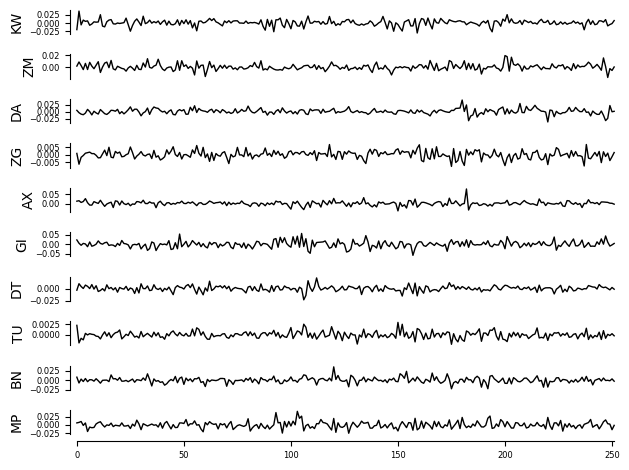

In [17]:
tp.plot_timeseries(dataframe=dataframe); plt.show()

In [30]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=dataframe, 
    cond_ind_test=parcorr,
    verbosity=1)
correlations = pcmci.get_lagged_dependencies(tau_max=20, val_only=True)['val_matrix']

NameError: name 'PCMCIplus' is not defined

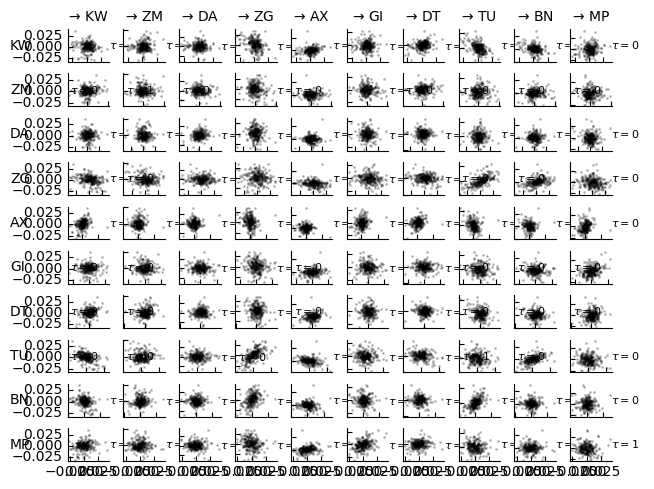

In [19]:
matrix_lags = None #np.argmax(np.abs(correlations), axis=2)
tp.plot_scatterplots(dataframe=dataframe, add_scatterplot_args={'matrix_lags':matrix_lags}); plt.show()


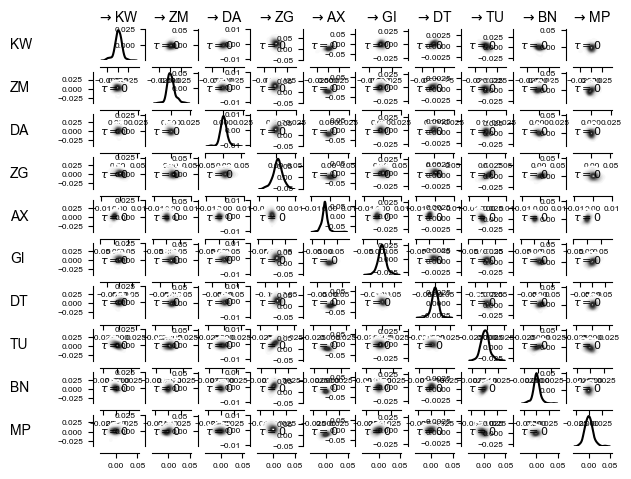

In [20]:
tp.plot_densityplots(dataframe=dataframe, add_densityplot_args={'matrix_lags':matrix_lags})
plt.show()

In [21]:
pcmci.verbosity = 1
results = pcmci.run_pcmci(tau_max=8, pc_alpha=None, alpha_level=0.01)


##
## Step 1: PC1 algorithm with lagged conditions
##

Parameters:
independence test = par_corr
tau_min = 1
tau_max = 8
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1



## Resulting lagged parent (super)sets:

    Variable KW has 16 link(s):
    [pc_alpha = 0.4]
        (MP -1): max_pval = 0.02231, min_val = -0.149
        (GI -4): max_pval = 0.05369, min_val = -0.127
        (TU -8): max_pval = 0.07164, min_val =  0.119
        (BN -7): max_pval = 0.10238, min_val =  0.108
        (DT -7): max_pval = 0.15879, min_val =  0.094
        (ZM -7): max_pval = 0.17433, min_val =  0.090
        (KW -5): max_pval = 0.19098, min_val = -0.088
        (DT -2): max_pval = 0.20138, min_val = -0.083
        (GI -2): max_pval = 0.21656, min_val =  0.083
        (ZM -3): max_pval = 0.25840, min_val =  0.075
        (ZM -1): max_pval = 0.27563, min_val =  0.073
        (DA -2): max_pval = 0.29847, min_val =  0.070
        (DA -7): max_pval = 0.31221, min_val = -0

In [22]:
print("p-values")
print (results['p_matrix'].round(3))
print("MCI partial correlations")
print (results['val_matrix'].round(2))

p-values
[[[1.    0.702 0.741 0.638 0.173 0.356 0.732 0.949 0.944]
  [0.001 0.471 0.131 0.301 0.382 0.203 0.954 0.59  0.499]
  [0.6   0.064 0.237 0.076 0.917 0.231 0.223 0.635 0.934]
  [0.001 0.011 0.272 0.494 0.674 0.946 0.87  0.483 0.762]
  [0.    0.591 0.38  0.386 0.235 0.914 0.811 0.795 0.747]
  [0.943 0.516 0.805 0.331 0.799 0.584 0.562 0.601 0.265]
  [0.    0.722 0.098 0.04  0.719 0.539 0.938 0.833 0.021]
  [0.    0.159 0.812 0.133 0.454 0.212 0.607 0.734 0.491]
  [0.005 0.049 0.16  0.237 0.095 0.714 0.354 0.036 0.141]
  [0.053 0.991 0.563 0.485 0.794 0.545 0.644 0.659 0.822]]

 [[0.001 0.235 0.921 0.135 0.116 0.725 0.566 0.134 0.661]
  [1.    0.851 0.414 0.347 0.534 0.843 0.936 0.658 0.008]
  [0.723 0.492 0.401 0.293 0.885 0.959 0.313 0.667 0.215]
  [0.013 0.818 0.604 0.034 0.988 0.605 0.532 0.766 0.442]
  [0.406 0.387 0.79  0.708 0.62  0.003 0.724 0.076 0.865]
  [0.294 0.036 0.885 0.953 0.778 0.903 0.98  0.459 0.695]
  [0.004 0.32  0.404 0.834 0.127 0.118 0.607 0.193 0.657]
  [

In [23]:
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], tau_max=8, fdr_method='fdr_bh')
pcmci.print_significant_links(
        p_matrix = q_matrix,
        val_matrix = results['val_matrix'],
        alpha_level = 0.01)
graph = pcmci.get_graph_from_pmatrix(p_matrix=q_matrix, alpha_level=0.01, 
            tau_min=0, tau_max=8, link_assumptions=None)
results['graph'] = graph


## Significant links at alpha = 0.01:

    Variable KW has 6 link(s):
        (TU  0): pval = 0.00000 | val = -0.443
        (DT  0): pval = 0.00000 | val =  0.317
        (AX  0): pval = 0.00011 | val =  0.265
        (ZM  0): pval = 0.00064 | val =  0.233
        (ZG  0): pval = 0.00102 | val = -0.226
        (BN  0): pval = 0.00523 | val = -0.193

    Variable ZM has 2 link(s):
        (KW  0): pval = 0.00064 | val =  0.233
        (DT  0): pval = 0.00439 | val =  0.193

    Variable DA has 0 link(s):

    Variable ZG has 3 link(s):
        (TU  0): pval = 0.00000 | val =  0.576
        (BN  0): pval = 0.00000 | val =  0.347
        (KW  0): pval = 0.00102 | val = -0.226

    Variable AX has 4 link(s):
        (TU  0): pval = 0.00000 | val = -0.319
        (KW  0): pval = 0.00011 | val =  0.265
        (MP  0): pval = 0.00015 | val =  0.258
        (DT  0): pval = 0.00032 | val =  0.246

    Variable GI has 1 link(s):
        (MP  0): pval = 0.00000 | val =  0.376

    Variable DT 

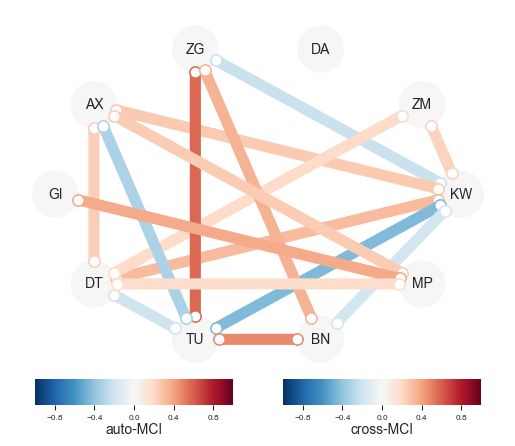

In [24]:
tp.plot_graph(
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    show_autodependency_lags=False
    ); plt.show()

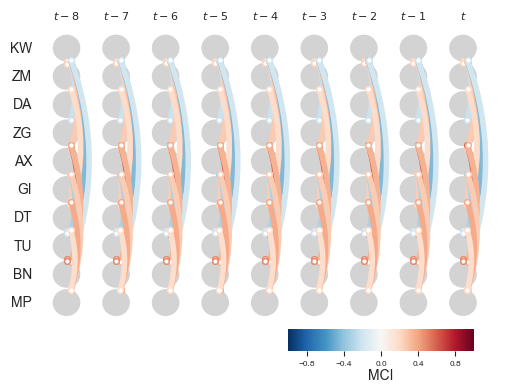

In [25]:
# Plot time series graph    
tp.plot_time_series_graph(
    figsize=(6, 4),
    val_matrix=results['val_matrix'],
    graph=results['graph'],
    var_names=var_names,
    link_colorbar_label='MCI',
    ); plt.show()

In [29]:
results['graph']

array([[['', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', '']],

       [['o-o', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['o-o', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', ''],
        ['', '', '', '', '', '', '', '', '']],

       [['', '', '', '', '', '', '', '', ''],
      

In [26]:
show = pd.DataFrame(results['val_matrix'][:,:,0])
show.columns = Y.columns
show.index = Y.columns
# Use seaborn color palette
cm = sns.color_palette("mako", as_cmap=True)

# Display DataFrame with color gradient
display(show.iloc[:10,:10].style.background_gradient(cmap=cm, vmin=-1, vmax=1))
display(port_cov_window.iloc[:10,:10].style.background_gradient(cmap=cm, vmin=-1, vmax=1))

,KW,ZM,DA,ZG,AX,GI,DT,TU,BN,MP
KW,0.000000,0.232574,-0.036287,-0.226234,0.264919,0.004998,0.317483,-0.442524,-0.192523,0.133044
ZM,0.232574,0.000000,-0.024079,-0.171123,0.057538,-0.071719,0.193133,0.016228,0.086967,0.031329
DA,-0.036287,-0.024079,0.000000,-0.000574,0.054433,-0.074451,0.000016,-0.006022,-0.008436,-0.090575
ZG,-0.226234,-0.171123,-0.000574,0.000000,-0.165203,-0.142284,-0.131049,0.576199,0.347133,-0.152237
AX,0.264919,0.057538,0.054433,-0.165203,0.000000,0.134295,0.246480,-0.318972,-0.066904,0.257770
GI,0.004998,-0.071719,-0.074451,-0.142284,0.134295,0.000000,-0.056139,-0.095334,-0.054066,0.376052
DT,0.317483,0.193133,0.000016,-0.131049,0.246480,-0.056139,0.000000,-0.204283,-0.027461,0.183045
TU,-0.442524,0.016228,-0.006022,0.576199,-0.318972,-0.095334,-0.204283,0.000000,0.477865,-0.108409
BN,-0.192523,0.086967,-0.008436,0.347133,-0.066904,-0.054066,-0.027461,0.477865,0.000000,0.034557
MP,0.133044,0.031329,-0.090575,-0.152237,0.257770,0.376052,0.183045,-0.108409,0.034557,0.000000


,KW,ZM,DA,ZG,AX,GI,DT,TU,BN,MP
KW,0.000083,0.000006,-0.000001,-0.000007,0.000031,0.000003,0.000016,-0.000004,-0.000018,0.000013
ZM,0.000006,0.000027,-0.000001,-0.000002,0.000002,-0.000003,0.000005,0.000000,0.000004,-0.000000
DA,-0.000001,-0.000001,0.000089,-0.000001,0.000006,-0.000011,-0.000000,-0.000000,0.000002,-0.000006
ZG,-0.000007,-0.000002,-0.000001,0.000007,-0.000005,-0.000006,-0.000002,0.000001,0.000008,-0.000005
AX,0.000031,0.000002,0.000006,-0.000005,0.000131,0.000038,0.000016,-0.000003,-0.000005,0.000030
GI,0.000003,-0.000003,-0.000011,-0.000006,0.000038,0.000293,-0.000004,-0.000001,-0.000006,0.000062
DT,0.000016,0.000005,-0.000000,-0.000002,0.000016,-0.000004,0.000031,-0.000001,-0.000004,0.000008
TU,-0.000004,0.000000,-0.000000,0.000001,-0.000003,-0.000001,-0.000001,0.000001,0.000003,-0.000001
BN,-0.000018,0.000004,0.000002,0.000008,-0.000005,-0.000006,-0.000004,0.000003,0.000052,0.000002
MP,0.000013,-0.000000,-0.000006,-0.000005,0.000030,0.000062,0.000008,-0.000001,0.000002,0.000098


In [28]:

display(show.style.background_gradient(cmap=cm, vmin=-1, vmax=1))
display(port_cov_window.style.background_gradient(cmap=cm, vmin=-1, vmax=1))

,KW,ZM,DA,ZG,AX,GI,DT,TU,BN,MP
KW,0.000000,0.232574,-0.036287,-0.226234,0.264919,0.004998,0.317483,-0.442524,-0.192523,0.133044
ZM,0.232574,0.000000,-0.024079,-0.171123,0.057538,-0.071719,0.193133,0.016228,0.086967,0.031329
DA,-0.036287,-0.024079,0.000000,-0.000574,0.054433,-0.074451,0.000016,-0.006022,-0.008436,-0.090575
ZG,-0.226234,-0.171123,-0.000574,0.000000,-0.165203,-0.142284,-0.131049,0.576199,0.347133,-0.152237
AX,0.264919,0.057538,0.054433,-0.165203,0.000000,0.134295,0.246480,-0.318972,-0.066904,0.257770
GI,0.004998,-0.071719,-0.074451,-0.142284,0.134295,0.000000,-0.056139,-0.095334,-0.054066,0.376052
DT,0.317483,0.193133,0.000016,-0.131049,0.246480,-0.056139,0.000000,-0.204283,-0.027461,0.183045
TU,-0.442524,0.016228,-0.006022,0.576199,-0.318972,-0.095334,-0.204283,0.000000,0.477865,-0.108409
BN,-0.192523,0.086967,-0.008436,0.347133,-0.066904,-0.054066,-0.027461,0.477865,0.000000,0.034557
MP,0.133044,0.031329,-0.090575,-0.152237,0.257770,0.376052,0.183045,-0.108409,0.034557,0.000000


,KW,ZM,DA,ZG,AX,GI,DT,TU,BN,MP
KW,0.000083,0.000006,-0.000001,-0.000007,0.000031,0.000003,0.000016,-0.000004,-0.000018,0.000013
ZM,0.000006,0.000027,-0.000001,-0.000002,0.000002,-0.000003,0.000005,0.000000,0.000004,-0.000000
DA,-0.000001,-0.000001,0.000089,-0.000001,0.000006,-0.000011,-0.000000,-0.000000,0.000002,-0.000006
ZG,-0.000007,-0.000002,-0.000001,0.000007,-0.000005,-0.000006,-0.000002,0.000001,0.000008,-0.000005
AX,0.000031,0.000002,0.000006,-0.000005,0.000131,0.000038,0.000016,-0.000003,-0.000005,0.000030
GI,0.000003,-0.000003,-0.000011,-0.000006,0.000038,0.000293,-0.000004,-0.000001,-0.000006,0.000062
DT,0.000016,0.000005,-0.000000,-0.000002,0.000016,-0.000004,0.000031,-0.000001,-0.000004,0.000008
TU,-0.000004,0.000000,-0.000000,0.000001,-0.000003,-0.000001,-0.000001,0.000001,0.000003,-0.000001
BN,-0.000018,0.000004,0.000002,0.000008,-0.000005,-0.000006,-0.000004,0.000003,0.000052,0.000002
MP,0.000013,-0.000000,-0.000006,-0.000005,0.000030,0.000062,0.000008,-0.000001,0.000002,0.000098
